<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data - OK
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Feature Engineering
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machine Classifier
from sklearn.svm import SVC

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount to /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AML - Week3 - Model Tunning/Project3/EasyVisa.csv')

In [ ]:
# making a copy
df = data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.140,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.390,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.230,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.190,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.760,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
df.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


#### Fixing the negative values in number of employees columns

In [ ]:
df['no_of_employees'] = df['no_of_employees'].apply(lambda x: abs(x))

In [ ]:
df['no_of_employees'].describe()

,no_of_employees
count,25480.000
mean,5667.089
std,22877.917
min,11.000
25%,1022.000
50%,2109.000
75%,3504.000
max,602069.000


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
df.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


In [ ]:
# Convert all object columns to categorical
#df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda x: x.astype('category'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


In [ ]:
# Dropping case_id column
df.drop('case_id', axis=1, inplace=True)


In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
# Getting a value count for each of the object variables.
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts())
    print('-' * 100)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
----------------

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

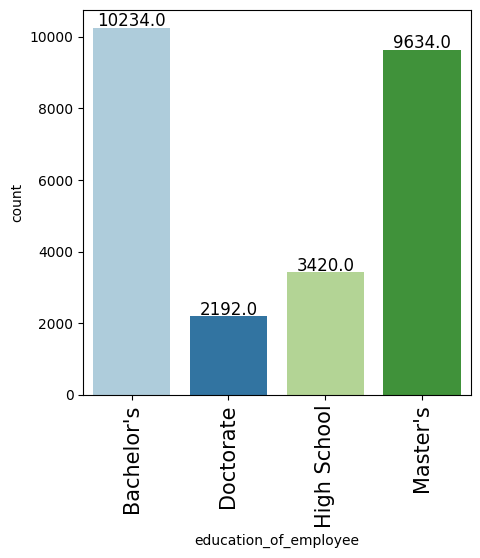

In [ ]:
labeled_barplot(df, 'education_of_employee', perc=False, n=None)

#### Observations on region of employment

#### Observations on job experience

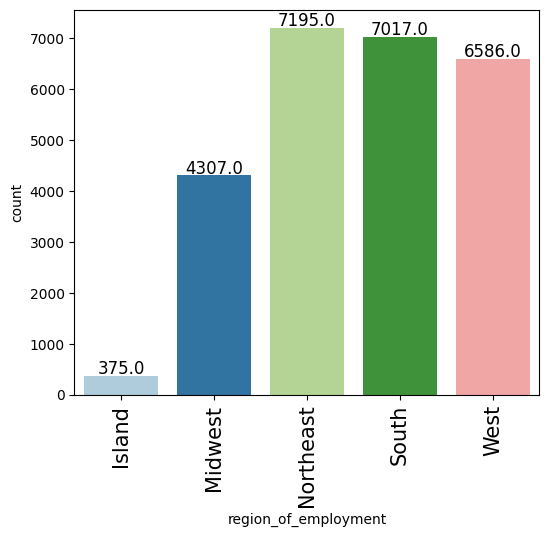

In [ ]:
labeled_barplot(df, 'region_of_employment', perc=False, n=None)


#### Observations on case status

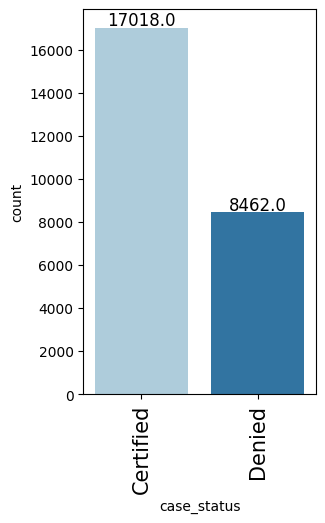

In [ ]:
labeled_barplot(df, 'case_status', perc=False, n=None)

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


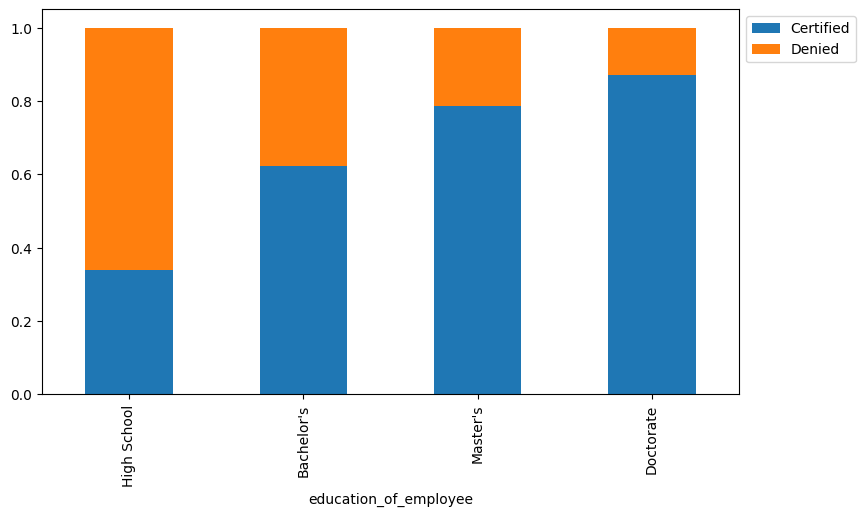

In [ ]:
stacked_barplot(df, 'education_of_employee', 'case_status')

In [ ]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True, ascending=False)

education_of_employee  case_status
Bachelor's             Certified     0.622
                       Denied        0.378
Doctorate              Certified     0.872
                       Denied        0.128
High School            Denied        0.660
                       Certified     0.340
Master's               Certified     0.786
                       Denied        0.214
Name: proportion, dtype: float64

- It seems that higher education does have a significant impact visa certification
- 87.2% of applicants with a Doctorate level education get a visa certified, and only 12.8% get denied a visa
- The percentage of certificate gets larger as the level of education is higher: For High School 34% get certified, for Bachelor's 62.2%, and for Master's 78.6%

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


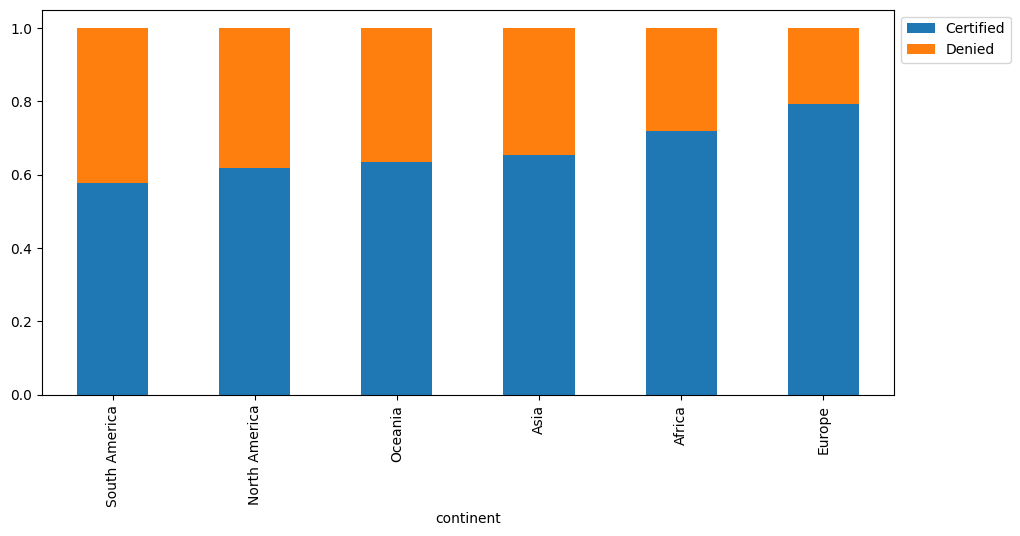

In [ ]:
stacked_barplot(df, 'continent', 'case_status')

In [ ]:
df.groupby('continent')['case_status'].value_counts(normalize=True)

continent      case_status
Africa         Certified     0.721
               Denied        0.279
Asia           Certified     0.653
               Denied        0.347
Europe         Certified     0.792
               Denied        0.208
North America  Certified     0.619
               Denied        0.381
Oceania        Certified     0.635
               Denied        0.365
South America  Certified     0.579
               Denied        0.421
Name: proportion, dtype: float64

- The Visa status does not really vary much across the different continents.
-  Europe had 79.2% certified, Africa 72.1% certified, Asia 65.3% , North America 61.9% and South America 57.9%

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


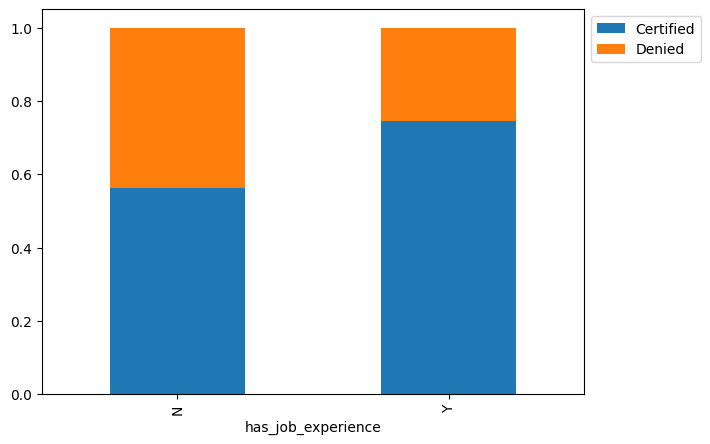

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status')

In [ ]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True)

has_job_experience  case_status
N                   Certified     0.561
                    Denied        0.439
Y                   Certified     0.745
                    Denied        0.255
Name: proportion, dtype: float64

In [ ]:
len(df)

25480

#### Checking if the prevailing wage is similar across all the regions of the US

In [ ]:
wagerordermedian= df.groupby('region_of_employment')['prevailing_wage'].median().sort_values(ascending=False)

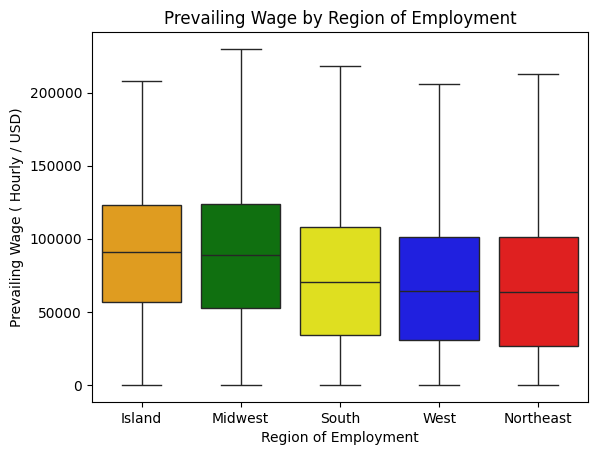

In [ ]:
sns.boxplot(data=df,x='region_of_employment',y='prevailing_wage',showfliers=False, hue = 'region_of_employment',palette=['Blue', 'Red', 'Yellow','Green','Orange'], legend=False ,order=wagerordermedian.index )
plt.ylabel('Prevailing Wage ( Hourly / USD)')
plt.xlabel('Region of Employment')
plt.title('Prevailing Wage by Region of Employment');

In [ ]:
df.groupby('region_of_employment')['prevailing_wage'].median().sort_values(ascending=False)

,prevailing_wage
region_of_employment,
Island,90678.170
Midwest,89153.910
South,70191.520
West,64358.440
Northeast,63276.510


In [ ]:
df.groupby('region_of_employment')['prevailing_wage'].mean().sort_values(ascending=False)

,prevailing_wage
region_of_employment,
Island,91712.751
Midwest,91696.742
South,74040.545
West,69832.629
Northeast,67872.663


- There is a slight difference in both the Mean and Median of prevailing wages across the regions of employment.
- The median ranges from 90,678 USD for the Island region to 63,276 USD for the West region.
- The mean ranges from 91,713 USD for the Island region to 67,873 USD again for the Westt region.
- From results it is expected that there would be a wide difference between the median and mean resulting as well a right skewdness of the distibution of each region because there is a larger number of High school and Bachelor's cases for which their prevailing wage would be expected to be lower than Master's and Doctorate cases in the datset.
- Also the prevailing wages are a mix of the per hour, per week , per month and per year.


#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

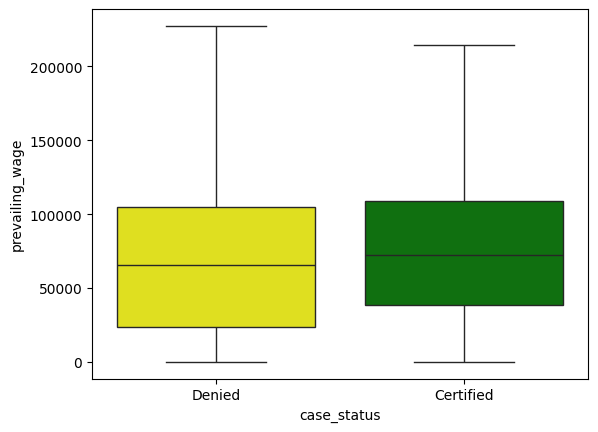

In [ ]:
sns.boxplot(data=df,x='case_status',y='prevailing_wage',showfliers=False, hue = 'case_status',palette=['Yellow', 'Green'], legend=False );

In [ ]:
df.groupby('case_status')['prevailing_wage'].median().sort_values(ascending=False)

,prevailing_wage
case_status,
Certified,72486.270
Denied,65431.460


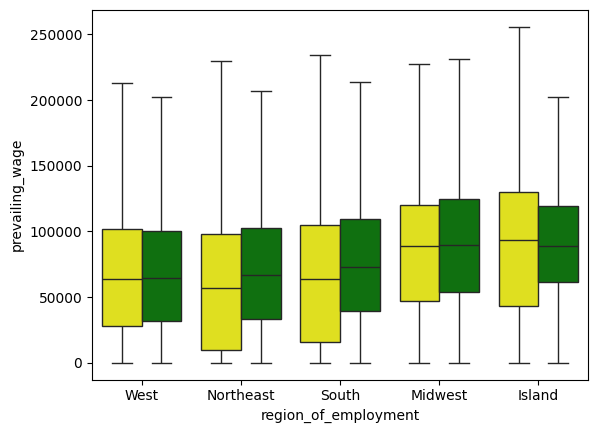

In [ ]:
sns.boxplot(data=df,x='region_of_employment',y='prevailing_wage',showfliers=False, hue = 'case_status',palette=['Yellow', 'Green'], legend=False );

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

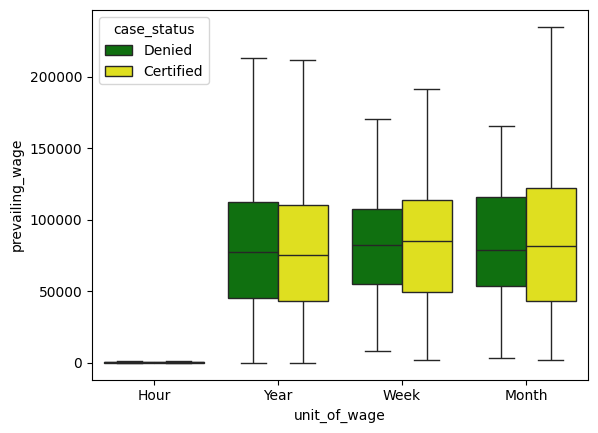

In [ ]:
sns.boxplot(data=df,x='unit_of_wage',y='prevailing_wage',showfliers=False, hue = 'case_status',palette=['Green', 'Yellow'], legend=True );

- There is no significant impact through unit_of_wage on visa applications getting certified.

### Other Multivariate Graphs

## Data Pre-processing

In [ ]:
# Converting yr_of_estab column to date time year
df['yr_of_estab'] = pd.to_datetime(df['yr_of_estab'], format='%Y')

In [ ]:
df['yr_of_estab'].max()

Timestamp('2016-01-01 00:00:00')

In [ ]:
# Creating new column to calculate number of years in yr_of_estab column and year 2016
df['years_in_business'] = 2016 - df['yr_of_estab'].dt.year

In [ ]:
# Dropping yr-of_estab column
df.drop('yr_of_estab', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
 10  years_in_business      25480 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 2.0+ MB


### Outlier Check

no_of_employees
prevailing_wage
years_in_business


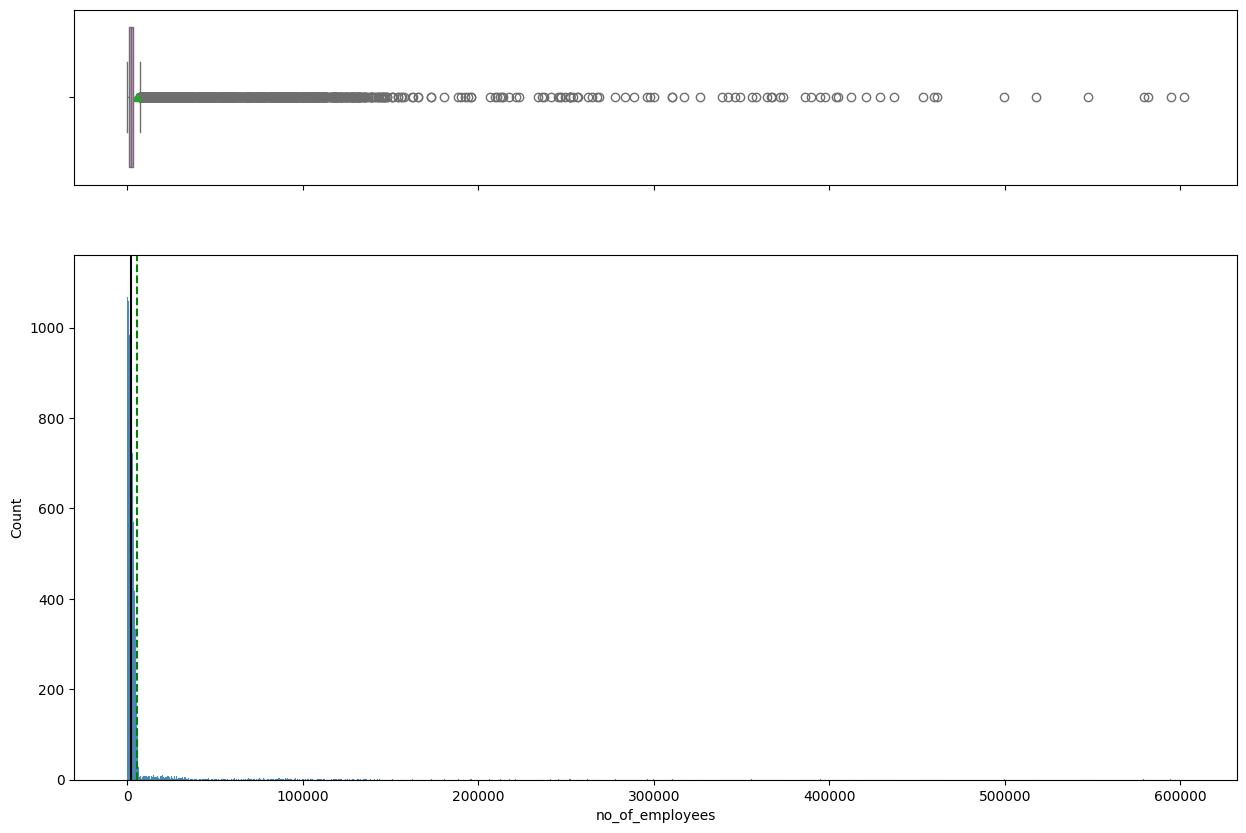

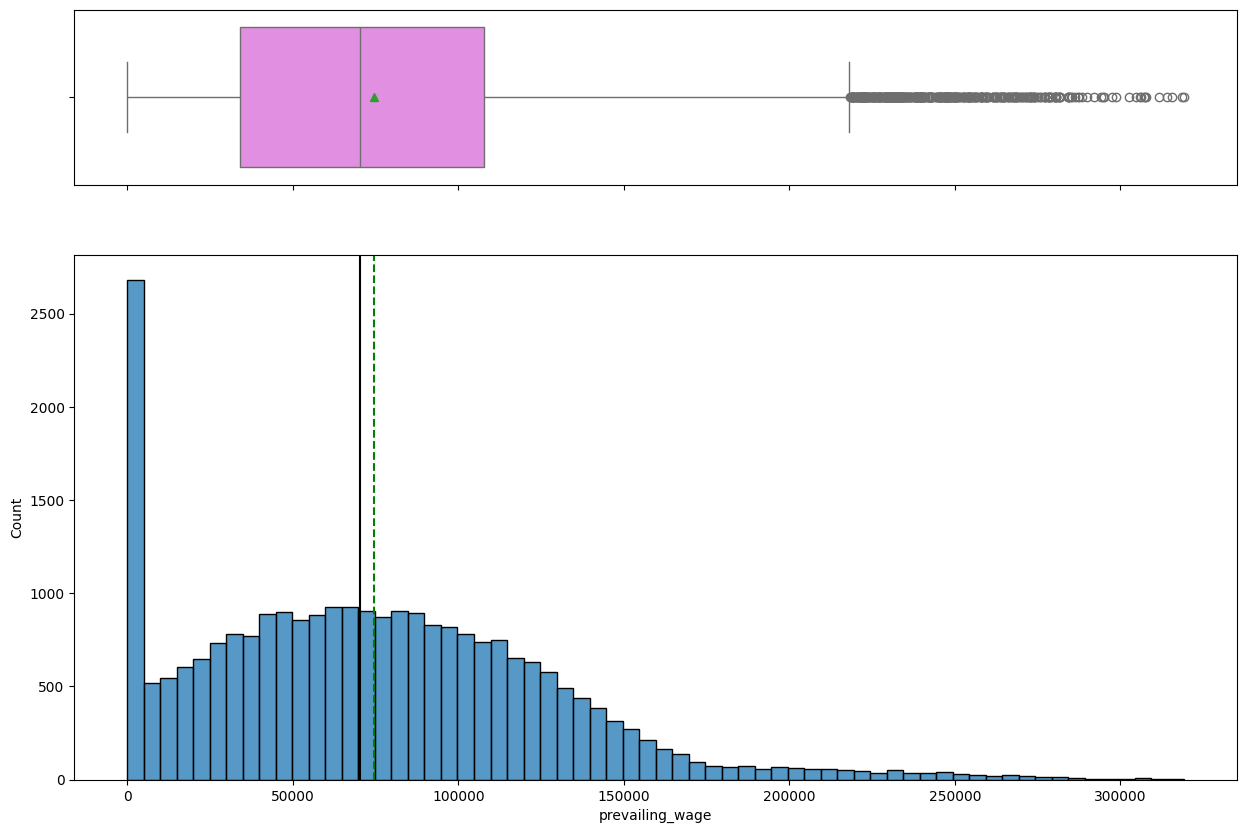

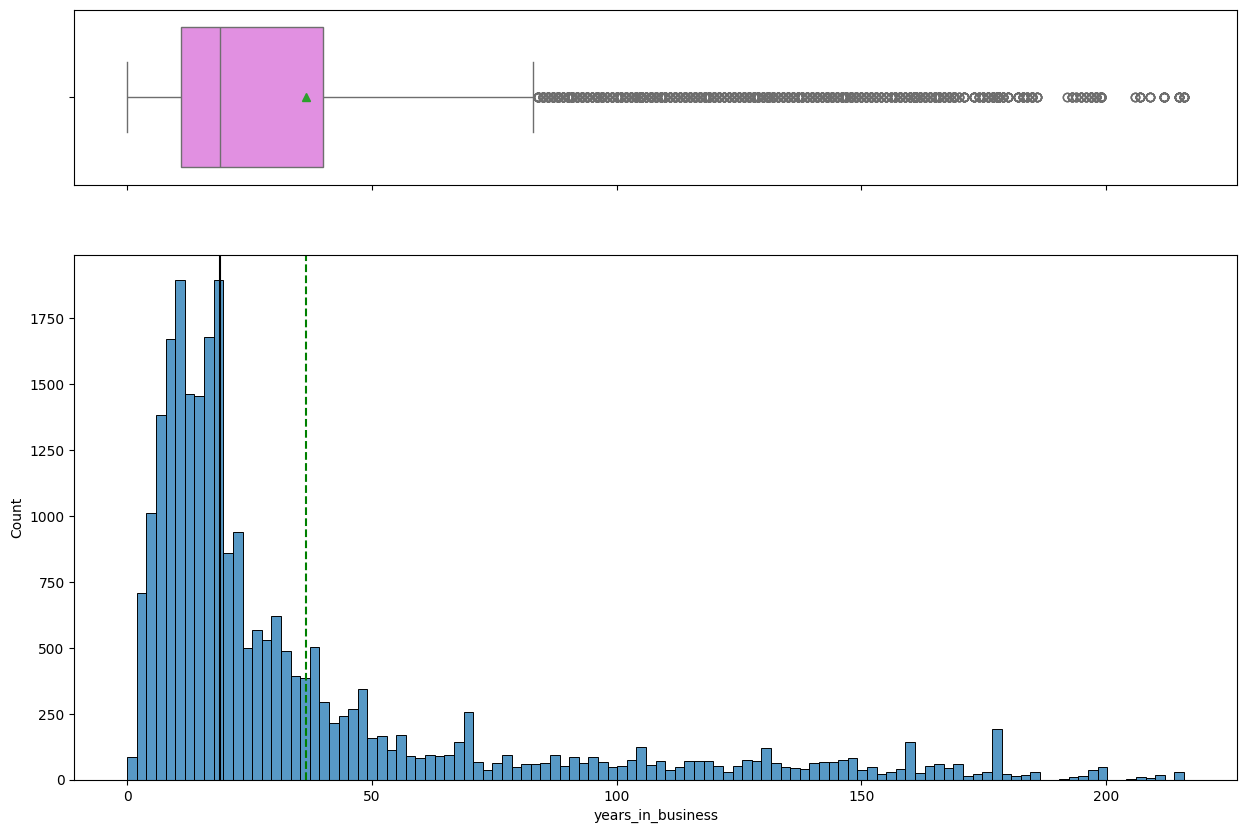

In [ ]:
# Checking for outliers in df
for col in df.select_dtypes(include='number').columns:
    print(col)
    histogram_boxplot(df, col)

In [ ]:
df.describe()

,no_of_employees,prevailing_wage,years_in_business
count,25480.000,25480.000,25480.000
mean,5667.089,74455.815,36.590
std,22877.917,52815.942,42.367
min,11.000,2.137,0.000
25%,1022.000,34015.480,11.000
50%,2109.000,70308.210,19.000
75%,3504.000,107735.513,40.000
max,602069.000,319210.270,216.000


        label  lower_whisker  lower_quartile   median  upper_quartile  \
0  #Employees         11.000        1022.000 2109.000        3504.000   

   upper_whisker  
0       7195.000  


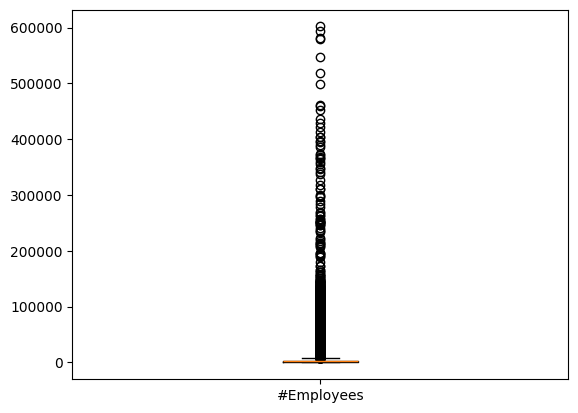

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['#Employees']
bp = plt.boxplot(df['no_of_employees'], labels=labels)
print(get_box_plot_data(labels,bp))
plt.show()

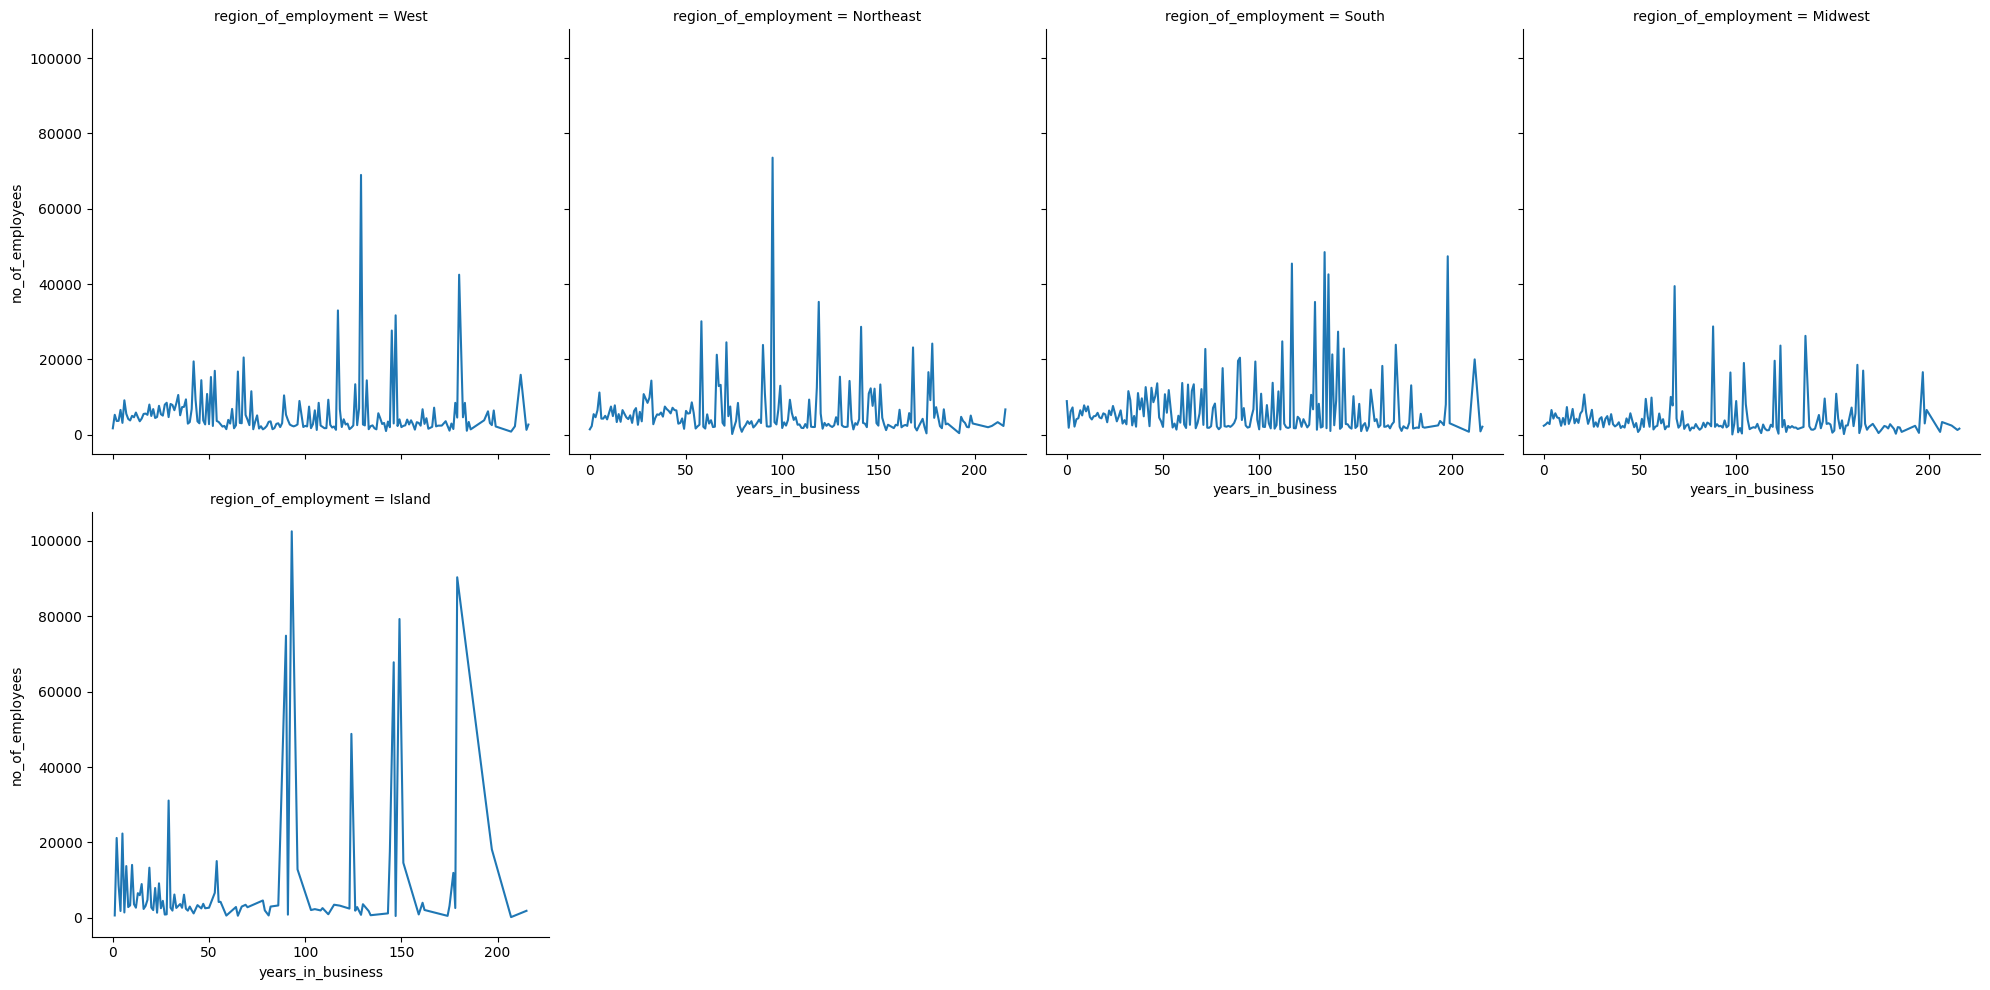

In [ ]:
sns.relplot(data=df,x='years_in_business',y='no_of_employees',col='region_of_employment',kind='line', errorbar=None, col_wrap=4)
plt.show()

- Most of the large number of employees companies are located in the Island region

In [ ]:
# Removing rows where number of employees exceeds
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,years_in_business
0,Asia,High School,N,N,14513,West,592.203,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,Northeast,83425.650,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,West,122996.860,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,West,83434.030,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,South,149907.390,Year,Y,Certified,11
5,Asia,Master's,Y,N,2339,South,78252.140,Year,Y,Certified,4
6,Asia,Bachelor's,N,N,4985,South,53635.390,Year,Y,Certified,22
7,North America,Bachelor's,Y,N,3035,West,418.230,Hour,Y,Denied,92
8,Asia,Bachelor's,N,N,4810,Midwest,74362.190,Year,Y,Certified,4
9,Europe,Doctorate,Y,N,2251,South,67514.760,Year,Y,Certified,21


In [ ]:
df.shape

(25480, 11)

### Data Preparation for modeling

In [ ]:
# Encoding 1 and 0 to 'Certified' and 'Denied' respectively, for analysis
# df["case_status"].replace(1, "Certified", inplace=True)
# df["case_status"].replace(0, "Denied", inplace=True)

In [ ]:
# Separating the independent and dependent variables
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

In [ ]:
X.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.140,Year,Y
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.390,Year,Y
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.230,Hour,Y
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.190,Year,Y
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.760,Year,Y


In [ ]:
# drop case_id column
X.drop('case_id', axis=1, inplace=True)

In [ ]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y


In [ ]:
y.head(10)

,case_status
0,Denied
1,Certified
2,Denied
3,Denied
4,Certified
5,Certified
6,Certified
7,Denied
8,Certified
9,Certified


In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(16307, 10) (4077, 10) (5096, 10)


In [ ]:
X_train.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
19907,Asia,High School,N,N,404,1837,Midwest,32683.510,Year,Y
19341,South America,Master's,N,N,300,1974,West,74402.140,Year,Y
18586,Asia,Doctorate,N,Y,3586,2009,West,25418.820,Year,Y
6730,Asia,Bachelor's,Y,N,1491,1990,West,117845.440,Year,Y
1097,Asia,Bachelor's,N,N,2875,1904,South,163069.510,Year,Y
21864,Asia,High School,Y,N,613,2009,South,53327.570,Month,N
25155,Asia,Master's,Y,N,920,1900,Northeast,132536.120,Year,N
14666,Asia,Bachelor's,N,N,1668,1987,South,165763.230,Year,N
1408,Asia,High School,N,N,1870,1950,South,95887.820,Year,Y
11683,North America,Master's,Y,N,2386,1992,South,79372.810,Year,Y


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16307 entries, 19907 to 17582
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              16307 non-null  object 
 1   education_of_employee  16307 non-null  object 
 2   has_job_experience     16307 non-null  object 
 3   requires_job_training  16307 non-null  object 
 4   no_of_employees        16307 non-null  int64  
 5   yr_of_estab            16307 non-null  int64  
 6   region_of_employment   16307 non-null  object 
 7   prevailing_wage        16307 non-null  float64
 8   unit_of_wage           16307 non-null  object 
 9   full_time_position     16307 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.astype(float)

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(float)

print(X_train.shape, X_val.shape, X_test.shape)

(16307, 21) (4077, 21) (5096, 21)


In [ ]:
y_train = pd.get_dummies(y_train, drop_first=True)
# X_train = X_train.astype(float)

y_val = pd.get_dummies(y_val, drop_first=True)
# X_val = X_val.astype(float)

y_test = pd.get_dummies(y_test, drop_first=True)
# X_test = X_test.astype(float)

print(y_train.shape, y_val.shape, y_test.shape)

(16307, 1) (4077, 1) (5096, 1)


In [ ]:
X_train.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
19907,404.000,1837.000,32683.510,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
19341,300.000,1974.000,74402.140,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
18586,3586.000,2009.000,25418.820,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
6730,1491.000,1990.000,117845.440,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
1097,2875.000,1904.000,163069.510,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

##### Finding best estimators for the **Decision Tree classifier** using Train and Test Dataset

In [ ]:
# Decision Tree Classifier without tunning
dtree_model = DecisionTreeClassifier(random_state=1)
fit_dtree_model = dtree_model.fit(X_train, y_train)

In [ ]:
# Checking recall score on train and validation set - Decision Tree model without tunning
print("Recall on train and validation set")
print(recall_score(y_train, fit_dtree_model.predict(X_train)))
print(recall_score(y_val, fit_dtree_model.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, fit_dtree_model.predict(X_train)))
print(precision_score(y_val, fit_dtree_model.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, fit_dtree_model.predict(X_train)))
print(accuracy_score(y_val, fit_dtree_model.predict(X_val)))

Recall on train and validation set
1.0
0.4911373707533235

Precision on train and validation set
1.0
0.4861111111111111

Accuracy on train and validation set
1.0
0.6585724797645327


In [ ]:
# Getting hyperparamaters for Decision Tree classifier
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Define the parameters of the Decision Tree classifier to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_accuracy_score = accuracy_score(y_train, y_train_pred)
            test_accuracy_score = accuracy_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_accuracy_score - test_accuracy_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_accuracy_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_accuracy_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best accuracy score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best accuracy score: 0.6426609105180534


##### Cross-validation - Decision Tree

In [ ]:
# Defining kfold for Decision Tree
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

# number of splits = 10

In [ ]:
# defining the Decision Tree model using best hyperparameters
cross_dt_model = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_split=10, max_leaf_nodes=20)

# storing accuracy values of model for every fold in "results"
results = cross_val_score(cross_dt_model, X_train, y_train, cv=kfold, scoring='accuracy')

In [ ]:
# Accuracy results for the Decision Tree model - Best K-Fold = 8
print(results)

[0.70386266 0.73635806 0.72838749 0.73206622 0.7314531  0.72900061
 0.73083998 0.75705521 0.71349693 0.7208589 ]


##### Finding best estimators for the **Bagging Classifier** using Train and Test Dataset

In [ ]:
# Bagging Classifier without tunning
bagging_model = DecisionTreeClassifier(random_state=1)
fit_bagging_model = bagging_model.fit(X_train, y_train)

In [ ]:
# Checking recall score on train and validation set - Decision Tree model without tunning
print("Recall on train and validation set")
print(recall_score(y_train, fit_bagging_model.predict(X_train)))
print(recall_score(y_val, fit_bagging_model.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, fit_bagging_model.predict(X_train)))
print(precision_score(y_val, fit_bagging_model.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, fit_bagging_model.predict(X_train)))
print(accuracy_score(y_val, fit_bagging_model.predict(X_val)))

Recall on train and validation set
1.0
0.4911373707533235

Precision on train and validation set
1.0
0.4861111111111111

Accuracy on train and validation set
1.0
0.6585724797645327


##### Finding best estimators for the **Randon Forrest Classifier** using Train and Test Dataset

In [ ]:
# Random Forest Classifier without tunning
randomf_model = RandomForestClassifier(random_state=1)
fit_randomf_model = randomf_model.fit(X_train, y_train)

In [ ]:
# Checking recall score on train and validation set - Random Forrest model without tunning
print("Recall on train and validation set")
print(recall_score(y_train, fit_randomf_model.predict(X_train)))
print(recall_score(y_val, fit_randomf_model.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, fit_randomf_model.predict(X_train)))
print(precision_score(y_val, fit_randomf_model.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, fit_randomf_model.predict(X_train)))
print(accuracy_score(y_val, fit_randomf_model.predict(X_val)))

Recall on train and validation set
1.0
0.4844903988183161

Precision on train and validation set
1.0
0.6325940212150434

Accuracy on train and validation set
1.0
0.7353446161393181


In [ ]:
# Using Randomized Search to find best hyperparameters for Random Forest Classifier based on the Train and test dataset
# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":np.arange(3,4,5),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(randomf_model, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'n_estimators': 150,
 'min_samples_leaf': 9,
 'min_impurity_decrease': 0.003,
 'max_samples': 0.4,
 'max_features': 0.6000000000000001,
 'max_depth': 3,
 'class_weight': 'balanced_subsample'}

In [ ]:
# defining the Random Forest model using best hyperparameters
cross_randomf_model = RandomForestClassifier(n_estimators=150, min_samples_leaf= 9, min_impurity_decrease= 0.03,max_samples= 0.4,max_features= 0.60, max_depth= 3,class_weight='balanced_subsample', random_state=1)

# storing accuracy values of model for every fold in "results"
results = cross_val_score(cross_randomf_model, X_train, y_train, cv=kfold, scoring='accuracy')

In [ ]:
# Accuracy results for the Random Forrest model - Best K-Fold =
print(results)

[0.69405273 0.70999387 0.7167382  0.70876763 0.71183323 0.71796444
 0.71244635 0.73865031 0.69693252 0.69509202]


**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

###Decision Tree Classifier

In [ ]:
# Building Decision Tree classifier without hyperparameter tuning
dtree_original = DecisionTreeClassifier(random_state=1)

In [ ]:
# training the decision tree model with oversampled training set
dtree_original.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

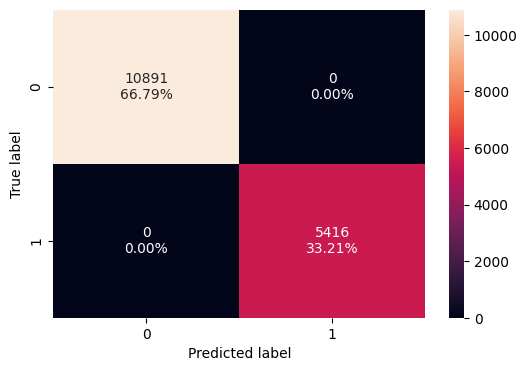

In [ ]:
# Confusion Matrix for Train Dataset
confusion_matrix_sklearn(dtree_original, X_train, y_train)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
decision_tree_original_perf_train = model_performance_classification_sklearn(
    dtree_original, X_train, y_train
)
decision_tree_original_perf_train


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


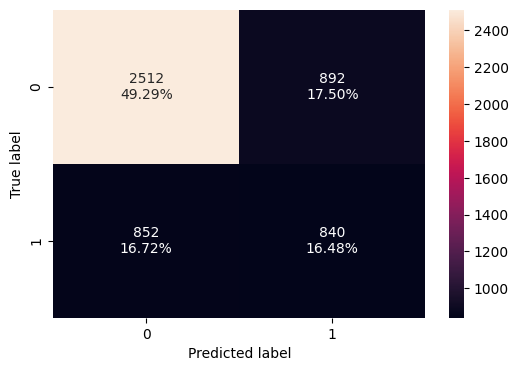

In [ ]:
# Confusion Matrix for Test Dataset
confusion_matrix_sklearn(dtree_original, X_test, y_test)

In [ ]:
# Using above defined function to get accuracy, recall and precision on test set
decision_tree_original_perf_test = model_performance_classification_sklearn(
    dtree_original, X_test, y_test
)
decision_tree_original_perf_test

,Accuracy,Recall,Precision,F1
0,0.658,0.496,0.485,0.491


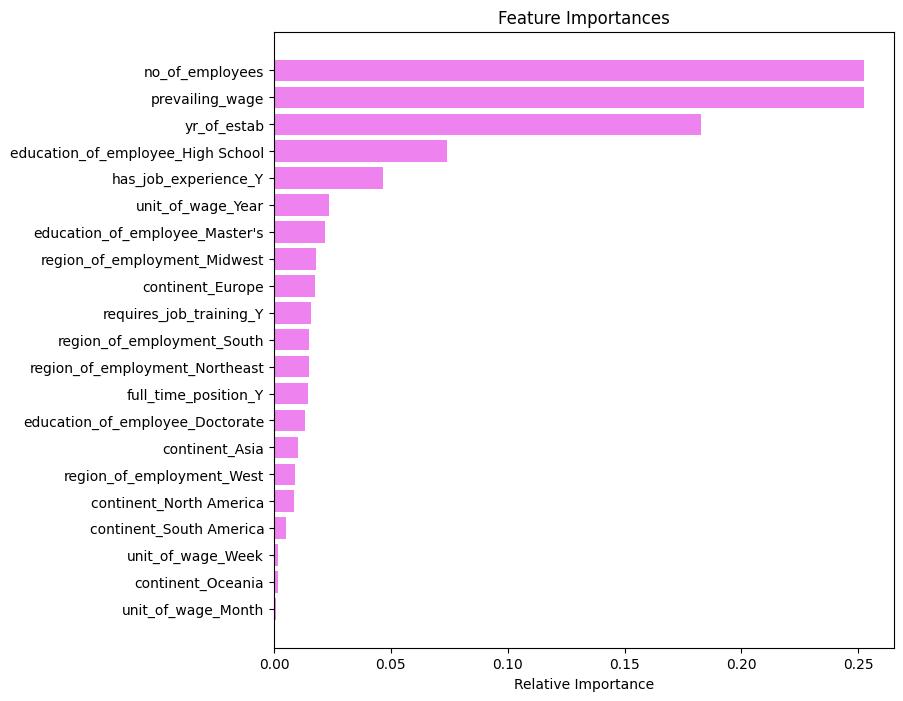

In [ ]:
# importance of features in the tree building
feature_names = list(X_train.columns)
importances = dtree_original.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Bagging Classifier

In [ ]:
# Build Bagging Classifier
bagging_estimator_original=BaggingClassifier(random_state=1)


In [ ]:
# Training with the Bagging Classifier
bagging_estimator_original.fit(X_train,y_train)

BaggingClassifier(random_state=1)

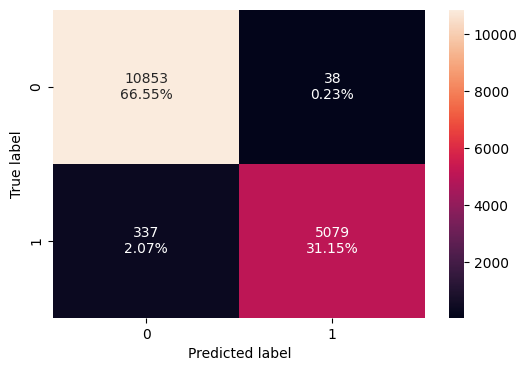

In [ ]:
# Confusion Matrix for Train Dataset
confusion_matrix_sklearn(bagging_estimator_original, X_train, y_train)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_original_perf_train = model_performance_classification_sklearn(
    bagging_estimator_original, X_train, y_train
)
bagging_lr_original_perf_train

,Accuracy,Recall,Precision,F1
0,0.977,0.938,0.993,0.964


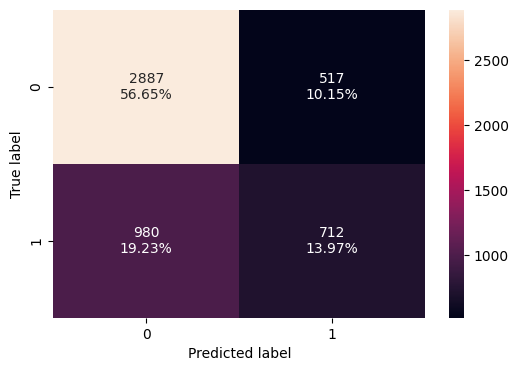

In [ ]:
# Confusion Matrix for Test Dataset
confusion_matrix_sklearn(bagging_estimator_original, X_test, y_test)

In [ ]:
# Using above defined function to get accuracy, recall and precision on test set
bagging_estimator_original_perf_test = model_performance_classification_sklearn(
    bagging_estimator_original, X_test, y_test
)
bagging_estimator_original_perf_test

,Accuracy,Recall,Precision,F1
0,0.706,0.421,0.579,0.488


### Random Forrest

In [ ]:
# model with  best hyperparameters tuning
randomf_original = RandomForestClassifier(random_state=1)

In [ ]:
# Training with the Random Forrest Classifier
randomf_original.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

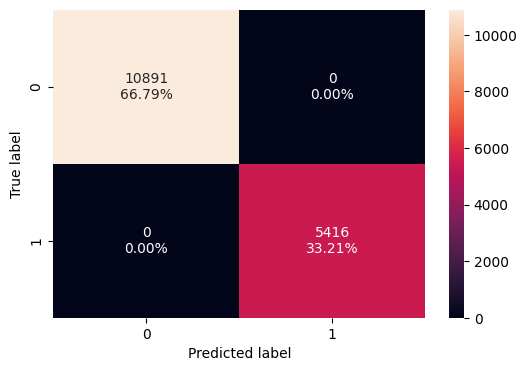

In [ ]:
# Confusion Matrix for Train Dataset
confusion_matrix_sklearn(randomf_original, X_train, y_train)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train and test set
randomf_original_perf_train = model_performance_classification_sklearn(
    randomf_original, X_train, y_train
)
randomf_original_perf_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


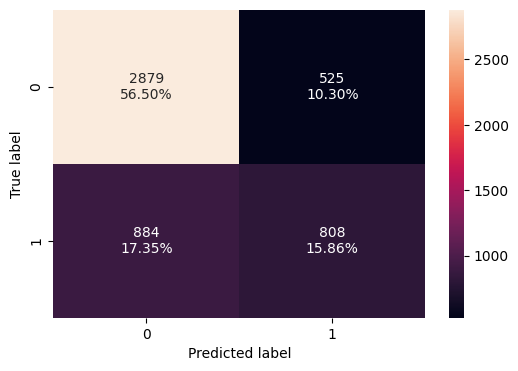

In [ ]:
# Confusion Matrix for Test Dataset
confusion_matrix_sklearn(randomf_original, X_test, y_test)

In [ ]:
# Using above defined function to get accuracy, recall and precision on test set
randomf_original_perf_test = model_performance_classification_sklearn(
    randomf_original, X_test, y_test
)
randomf_original_perf_test

,Accuracy,Recall,Precision,F1
0,0.724,0.478,0.606,0.534


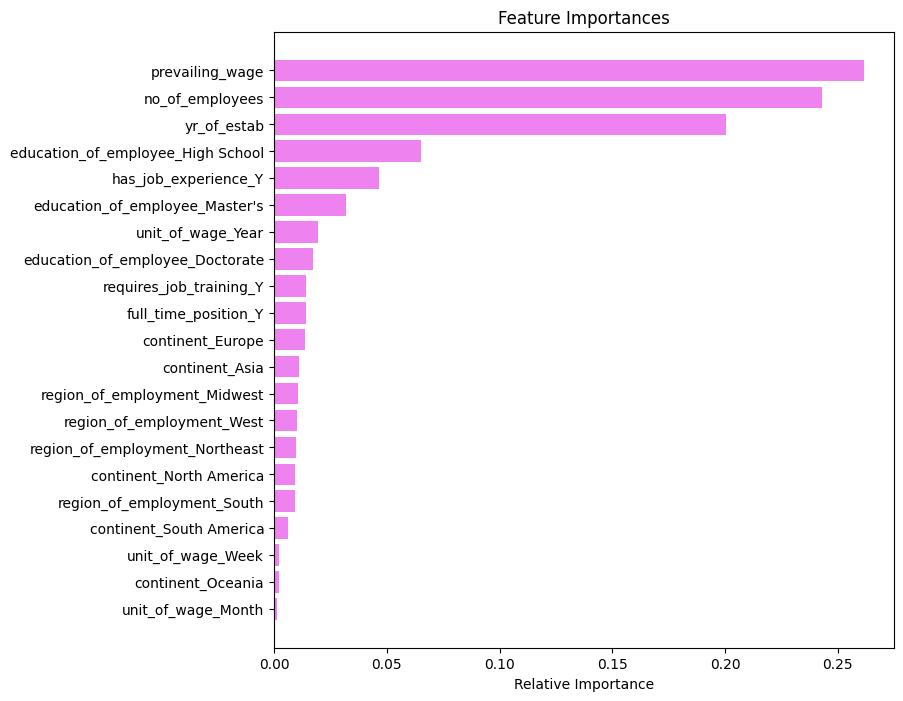

In [ ]:
# importance of features in the Random Forrest Classifier
feature_names = list(X_train.columns)
importances = randomf_original.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Building with oversampled data

### Decision Tree Classifier with oversampled data

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique) for Decision Tree Classifier.
# Sampling_strategy is set to 1.0, meaning the minority class will be oversampled
# to have the same number of samples as the majority class
dtree_over_sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_dtree_over, y_train_dtree_over = dtree_over_sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(y_train.sum()[0]))
print("Before OverSampling, count of label '0': {} \n".format(len(y_train) - y_train.sum()[0]))

print("After OverSampling, count of label '1': {}".format(y_train_dtree_over.sum()[0]))
print("After OverSampling, count of label '0': {} \n".format(len(y_train_dtree_over) - y_train_dtree_over.sum()[0]))

print("After OverSampling, the shape of train_X: {}".format(X_train_dtree_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_dtree_over.shape))

Before OverSampling, count of label '1': 5416
Before OverSampling, count of label '0': 10891 

After OverSampling, count of label '1': 10891
After OverSampling, count of label '0': 10891 

After OverSampling, the shape of train_X: (21782, 21)
After OverSampling, the shape of train_y: (21782, 1) 



In [ ]:
# Let's train a Decision Tree classifier using the oversampled data with best hyperparameters
dtree_over = DecisionTreeClassifier(random_state=1, max_depth=2, max_leaf_nodes= 50,min_samples_split= 10 )

In [ ]:
# training the Decision Tree classifier with oversampled training set
dtree_over.fit(X_train_dtree_over, y_train_dtree_over)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

- Let's check the performance on the oversampled train and validation sets

In [ ]:
 # Predicting the target for train and validation set
pred_train_tree_over = dtree_over.predict(X_train_dtree_over)
pred_val_tree_over = dtree_over.predict(X_val)


In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
decision_tree_over_perf_train = model_performance_classification_sklearn(
    dtree_over, X_train_dtree_over, y_train_dtree_over
)
decision_tree_over_perf_train

,Accuracy,Recall,Precision,F1
0,0.709,0.814,0.672,0.736


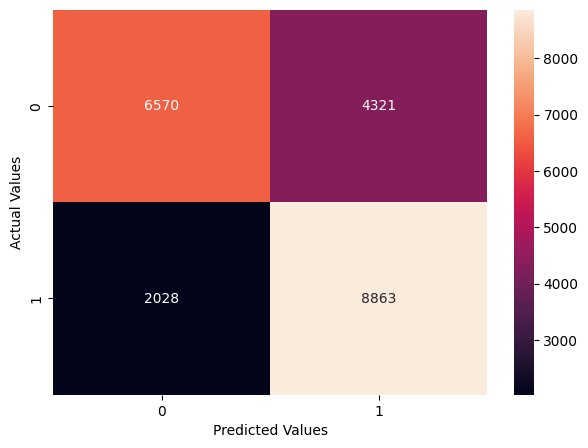

In [ ]:
# Confusion matrix for oversampled train data for Decision tree Classifier
cm_tree_over_train = confusion_matrix(y_train_dtree_over, pred_train_tree_over)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_tree_over_train, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [ ]:
# Using above defined function to get accuracy, recall and precision on validation set
decision_tree_over_perf_val = model_performance_classification_sklearn(
    dtree_over, X_val, y_val
)
decision_tree_over_perf_val

,Accuracy,Recall,Precision,F1
0,0.634,0.685,0.465,0.554


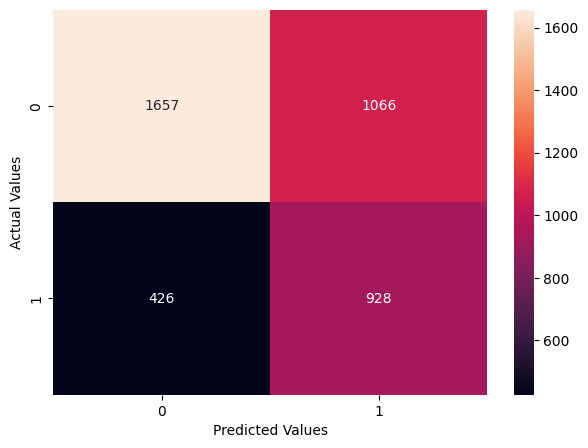

In [ ]:
# Confusion matrix for oversampled validation data for Decision tree Classifier
cm_tree_over_val = confusion_matrix(y_val, pred_val_tree_over)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_tree_over_val, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

### Bagging Classifier with oversampled data

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique) for Bagging Classifier.
# Sampling_strategy is set to 1.0, meaning the minority class will be oversampled
# to have the same number of samples as the majority class
bagging_over_sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_bagging_over, y_train_bagging_over = bagging_over_sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(y_train.sum()[0]))
print("Before OverSampling, count of label '0': {} \n".format(len(y_train) - y_train.sum()[0]))

print("After OverSampling, count of label '1': {}".format(y_train_bagging_over.sum()[0]))
print("After OverSampling, count of label '0': {} \n".format(len(y_train_bagging_over) - y_train_bagging_over.sum()[0]))

print("After OverSampling, the shape of train_X: {}".format(X_train_bagging_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_bagging_over.shape))

Before OverSampling, count of label '1': 5416
Before OverSampling, count of label '0': 10891 

After OverSampling, count of label '1': 10891
After OverSampling, count of label '0': 10891 

After OverSampling, the shape of train_X: (21782, 21)
After OverSampling, the shape of train_y: (21782, 1) 



In [ ]:

# Build Bagging Classifier
bagging_estimator_over=BaggingClassifier(random_state=1)

In [ ]:
# training the Bagging classifier with oversampled training set
bagging_estimator_over.fit(X_train_bagging_over, y_train_bagging_over)

BaggingClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train_bagging_over = bagging_estimator_over.predict(X_train_bagging_over)
pred_val_bagging_over = bagging_estimator_over.predict(X_val)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
bagging_over_perf_train = model_performance_classification_sklearn(
    bagging_estimator_over, X_train_bagging_over, y_train_bagging_over
)
bagging_over_perf_train

,Accuracy,Recall,Precision,F1
0,0.984,0.972,0.995,0.983


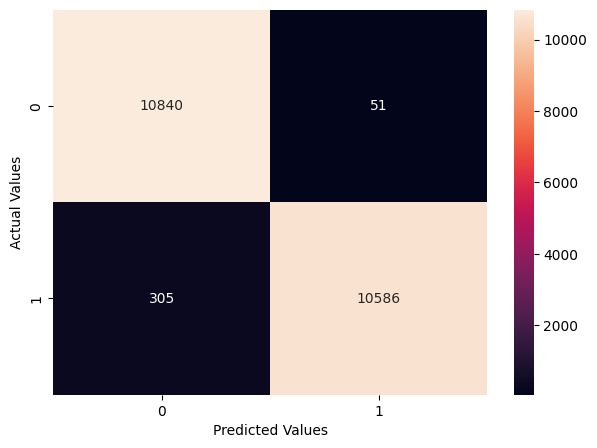

In [ ]:
# Confusion matrix for oversampled train data for Bagging Classifier
cm_bagging_over_train = confusion_matrix(y_train_bagging_over, pred_train_bagging_over)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_bagging_over_train, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [ ]:
# Using above defined function to get accuracy, recall and precision on validation set
bagging_over_perf_val = model_performance_classification_sklearn(
    bagging_estimator_over, X_val, y_val
)
bagging_over_perf_val

,Accuracy,Recall,Precision,F1
0,0.710,0.445,0.584,0.505


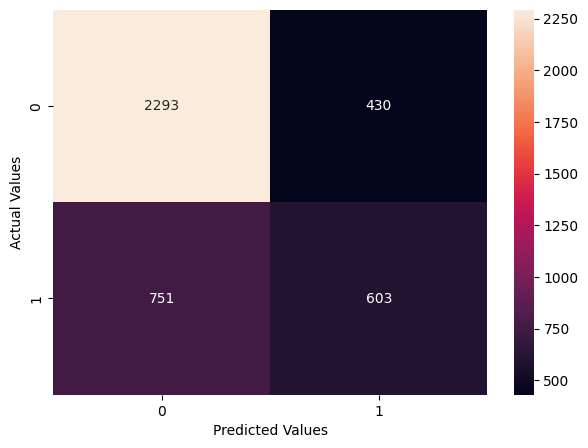

In [ ]:
# Confusion matrix for oversampled validation data for Bagging Classifier
cm_bagging_over_val = confusion_matrix(y_val, pred_val_bagging_over)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_bagging_over_val, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

### Random Forrest with oversampled data

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique) for Randon Forrest Classifier.
# Sampling_strategy is set to 1.0, meaning the minority class will be oversampled
# to have the same number of samples as the majority class
randomf_over_sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_randomf_over, y_train_randomf_over = randomf_over_sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(y_train.sum()[0]))
print("Before OverSampling, count of label '0': {} \n".format(len(y_train) - y_train.sum()[0]))

print("After OverSampling, count of label '1': {}".format(y_train_randomf_over.sum()[0]))
print("After OverSampling, count of label '0': {} \n".format(len(y_train_randomf_over) - y_train_randomf_over.sum()[0]))

print("After OverSampling, the shape of train_X: {}".format(X_train_randomf_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_randomf_over.shape))

Before OverSampling, count of label '1': 5416
Before OverSampling, count of label '0': 10891 

After OverSampling, count of label '1': 10891
After OverSampling, count of label '0': 10891 

After OverSampling, the shape of train_X: (21782, 21)
After OverSampling, the shape of train_y: (21782, 1) 



In [ ]:
# Build Forrest classifier using the oversampled data with best hyperparameters
randomf_over = RandomForestClassifier(n_estimators=150, min_samples_leaf= 9, min_impurity_decrease= 0.03,max_samples= 0.4,max_features= 0.60, max_depth= 3,class_weight='balanced_subsample', random_state=1)

In [ ]:
# Training with the Random Forrest Classifier
randomf_over.fit(X_train_randomf_over, y_train_randomf_over)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       max_features=0.6, max_samples=0.4,
                       min_impurity_decrease=0.03, min_samples_leaf=9,
                       n_estimators=150, random_state=1)

- Let's check the performance on the oversampled train and validation sets

In [ ]:
# Predicting the target for train and validation set
pred_train_randomf_over = randomf_over.predict(X_train_randomf_over)
pred_val_randomf_over = randomf_over.predict(X_val)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
randomf_over_perf_train = model_performance_classification_sklearn(
    randomf_over, X_train_bagging_over, y_train_randomf_over
)
randomf_over_perf_train

,Accuracy,Recall,Precision,F1
0,0.735,0.713,0.745,0.729


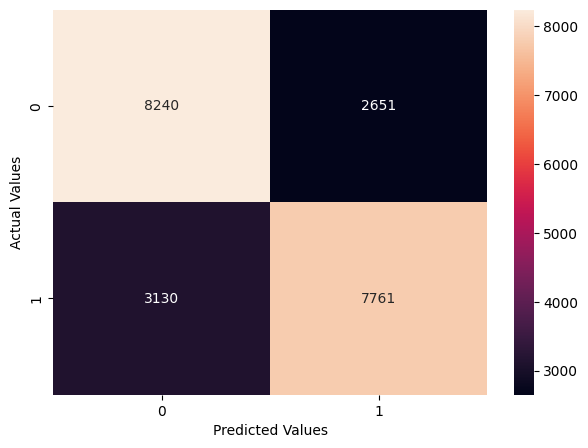

In [ ]:
# Confusion matrix for oversampled train data for Random Forrest Classifier
cm_randomf_over_train = confusion_matrix(y_train_randomf_over, pred_train_randomf_over)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_randomf_over_train, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [ ]:
# Using above defined function to get accuracy, recall and precision on validation set
randomf_over_perf_val = model_performance_classification_sklearn(
    randomf_over, X_val, y_val
)
randomf_over_perf_val

,Accuracy,Recall,Precision,F1
0,0.677,0.519,0.514,0.517


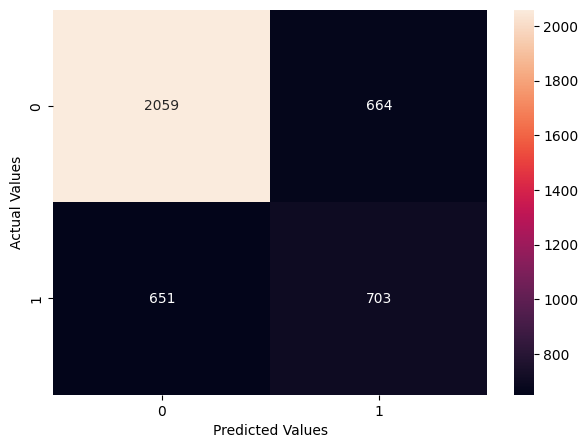

In [ ]:
# Confusion matrix for oversampled validation data for Random Forrest Classifier
cm_randomf_over_val = confusion_matrix(y_val, pred_val_randomf_over)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_randomf_over_val, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

## Model Building with undersampled data

### Decision Tree Classifier with undersampled data

In [ ]:
# fit random under sampler on the train data. Sampler_strategy = 1 means represent the sma e number s of observations for both classes.
# The RandomUnderSampler function basically just random observations from the majority claas
# This 1:1 actually reduces the bias in the prediction model
dtree_under_rs = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_dtree_under, y_train_dtree_under = dtree_under_rs.fit_resample(X_train, y_train)

In [ ]:
print("Before UnderSampling, count of label '1': {}".format(y_train.sum()[0]))
print("Before UnderSampling, count of label '0': {} \n".format(len(y_train) - y_train.sum()[0]))

print("After UnderSampling, count of label '1': {}".format(y_train_dtree_under.sum()[0]))
print("After UnderSampling, count of label '0': {} \n".format(len(y_train_dtree_under) - y_train_dtree_under.sum()[0]))

print("After UnderSampling, the shape of train_X: {}".format(X_train_dtree_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_dtree_under.shape))

Before UnderSampling, count of label '1': 5416
Before UnderSampling, count of label '0': 10891 

After UnderSampling, count of label '1': 5416
After UnderSampling, count of label '0': 5416 

After UnderSampling, the shape of train_X: (10832, 21)
After UnderSampling, the shape of train_y: (10832, 1) 



In [ ]:
# Let's train a Decision Tree classifier with best hyperparameters using the undersampled data
dtree_under = DecisionTreeClassifier(random_state=1, max_depth=2, max_leaf_nodes= 50,min_samples_split= 10 )

- Let's check the performance on the undersampled train and validation sets

In [ ]:
# training the Decision Tree classifier with undersampled training set
dtree_under.fit(X_train_dtree_under, y_train_dtree_under)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

In [ ]:
 # Predicting the target for train and validation set
pred_train_tree_under = dtree_over.predict(X_train_dtree_under)
pred_val_tree_under = dtree_under.predict(X_val)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
decision_tree_under_perf_train = model_performance_classification_sklearn(
    dtree_under, X_train_dtree_under, y_train_dtree_under
)
decision_tree_under_perf_train

,Accuracy,Recall,Precision,F1
0,0.661,0.712,0.646,0.678


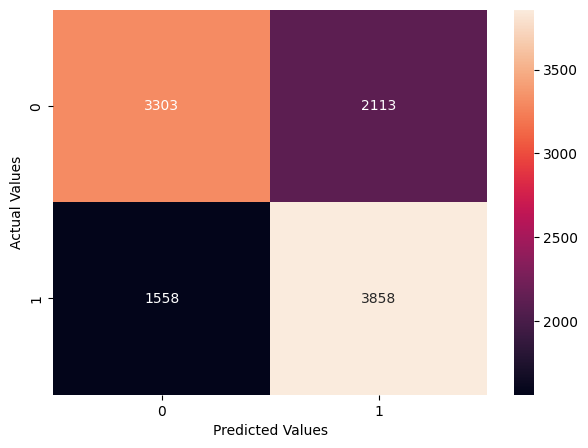

In [ ]:
# Confusion matrix for undersampled train data for Decision tree Classifier
cm_tree_under_train = confusion_matrix(y_train_dtree_under, pred_train_tree_under)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_tree_under_train, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [ ]:
# Using above defined function to get accuracy, recall and precision on validation set
decision_tree_under_perf_val = model_performance_classification_sklearn(
    dtree_under, X_val, y_val
)
decision_tree_under_perf_val

,Accuracy,Recall,Precision,F1
0,0.634,0.685,0.465,0.554


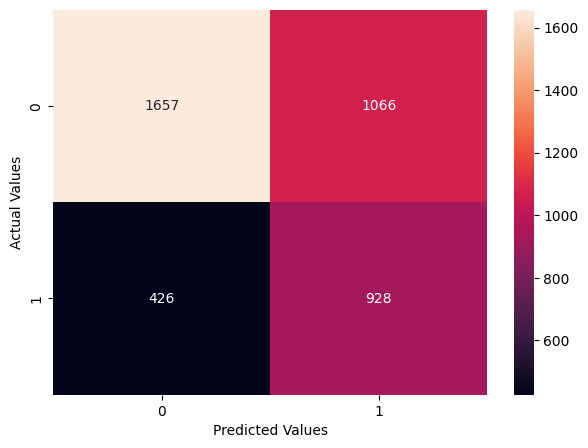

In [ ]:
# Confusion matrix for undersampled validation data for Decision tree Classifier
cm_tree_under_val = confusion_matrix(y_val, pred_val_tree_under)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_tree_under_val, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

### Bagging Classifier with undersampled data

In [ ]:
# fit random under sampler on the train data. Sampler_strategy = 1 means represent the sma e number s of observations for both classes.
# The RandomUnderSampler function basically just random observations from the majority claas
# This 1:1 actually reduces the bias in the prediction model
bagging_under_rs = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_bagging_under, y_train_bagging_under = bagging_under_rs.fit_resample(X_train, y_train)

In [ ]:
print("Before UnderSampling, count of label '1': {}".format(y_train.sum()[0]))
print("Before UnderSampling, count of label '0': {} \n".format(len(y_train) - y_train.sum()[0]))

print("After UnderSampling, count of label '1': {}".format(y_train_bagging_under.sum()[0]))
print("After UnderSampling, count of label '0': {} \n".format(len(y_train_bagging_under) - y_train_bagging_under.sum()[0]))

print("After UnderSampling, the shape of train_X: {}".format(y_train_bagging_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_bagging_under.shape))

Before UnderSampling, count of label '1': 5416
Before UnderSampling, count of label '0': 10891 

After UnderSampling, count of label '1': 5416
After UnderSampling, count of label '0': 5416 

After UnderSampling, the shape of train_X: (10832, 1)
After UnderSampling, the shape of train_y: (10832, 1) 



In [ ]:
# Build Bagging classifier using the undersampled data
bagging_estimator_under=BaggingClassifier(random_state=1)

- Let's check the performance on the undersampled train and validation sets

In [ ]:
# training the Bagging classifier with undersampled training set
bagging_estimator_under.fit(X_train_bagging_under, y_train_bagging_under)

BaggingClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train_bagging_under = bagging_estimator_under.predict(X_train_bagging_under)
pred_val_bagging_under = bagging_estimator_under.predict(X_val)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
bagging_under_perf_train = model_performance_classification_sklearn(
    bagging_estimator_under, X_train_bagging_under, y_train_bagging_under
)
bagging_under_perf_train

,Accuracy,Recall,Precision,F1
0,0.981,0.971,0.991,0.981


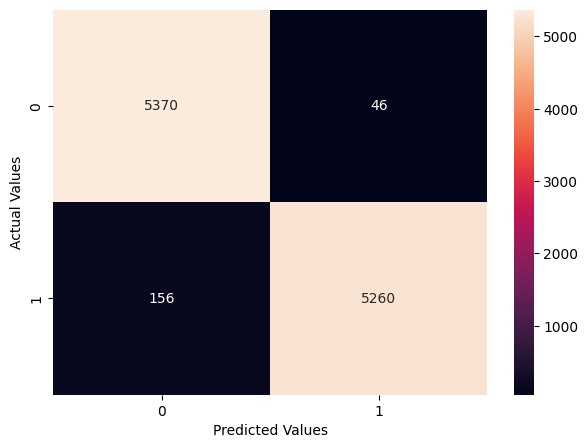

In [ ]:
# Confusion matrix for undersampled train data for Bagging Classifier
cm_bagging_under_train = confusion_matrix(y_train_bagging_under, pred_train_bagging_under)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_bagging_under_train, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [ ]:
# Using above defined function to get accuracy, recall and precision on validation set
bagging_under_perf_val = model_performance_classification_sklearn(
    bagging_estimator_under, X_val, y_val
)
bagging_under_perf_val

,Accuracy,Recall,Precision,F1
0,0.694,0.614,0.534,0.571


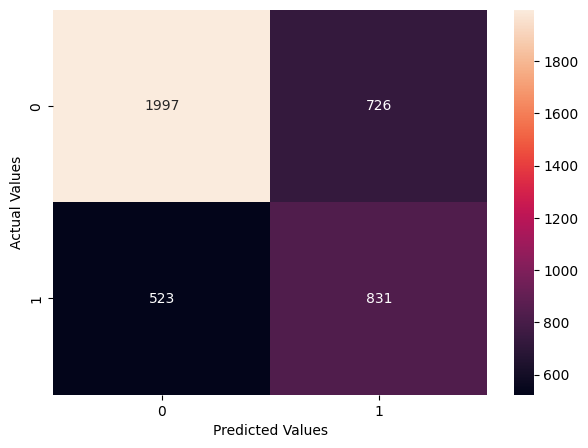

In [ ]:
# Confusion matrix for undersampled validation data for Bagging Classifier
cm_bagging_under_val = confusion_matrix(y_val, pred_val_bagging_under)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_bagging_under_val, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

### Random Forest with undersampled data

In [ ]:
# fit random under sampler on the train data. Sampler_strategy = 1 means represent the sma e number s of observations for both classes.
# The RandomUnderSampler function basically just random observations from the majority claas
# This 1:1 actually reduces the bias in the prediction model
randomf_under_rs = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_randomf_under, y_train_randomf_under = randomf_under_rs.fit_resample(X_train, y_train)

In [ ]:
print("Before UnderSampling, count of label '1': {}".format(y_train.sum()[0]))
print("Before UnderSampling, count of label '0': {} \n".format(len(y_train) - y_train.sum()[0]))

print("After UnderSampling, count of label '1': {}".format(y_train_randomf_under.sum()[0]))
print("After UnderSampling, count of label '0': {} \n".format(len(y_train_randomf_under) - y_train_randomf_under.sum()[0]))

print("After UnderSampling, the shape of train_X: {}".format(y_train_randomf_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_randomf_under.shape))

Before UnderSampling, count of label '1': 5416
Before UnderSampling, count of label '0': 10891 

After UnderSampling, count of label '1': 5416
After UnderSampling, count of label '0': 5416 

After UnderSampling, the shape of train_X: (10832, 1)
After UnderSampling, the shape of train_y: (10832, 1) 



- Let's check the performance on the undersampled train and validation sets

In [ ]:
# Build Forrest classifier using the undersampled data and best hyperparamaters
randomf_under = RandomForestClassifier(n_estimators=150, min_samples_leaf= 9, min_impurity_decrease= 0.03,max_samples= 0.4,max_features= 0.60, max_depth= 3,class_weight='balanced_subsample', random_state=1)

In [ ]:
# Training with the Random Forrest Classifier
randomf_under.fit(X_train_randomf_under, y_train_randomf_under)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       max_features=0.6, max_samples=0.4,
                       min_impurity_decrease=0.03, min_samples_leaf=9,
                       n_estimators=150, random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train_randomf_under = randomf_under.predict(X_train_randomf_under)
pred_val_randomf_under = randomf_under.predict(X_val)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
randomf_under_perf_train = model_performance_classification_sklearn(
    randomf_under, X_train_randomf_under, y_train_randomf_under
)
randomf_under_perf_train

,Accuracy,Recall,Precision,F1
0,0.599,0.262,0.804,0.396


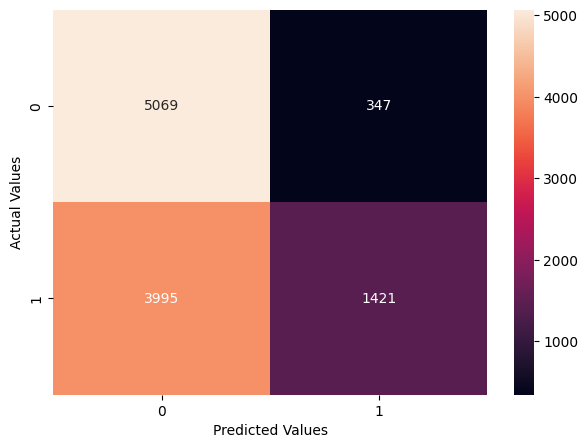

In [ ]:
# Confusion matrix for undersampled train data for Random Forrest Classifier
cm_randomf_under_train = confusion_matrix(y_train_randomf_under, pred_train_randomf_under)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_randomf_under_train, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [ ]:
# Using above defined function to get accuracy, recall and precision on validation set
randomf_under_perf_val = model_performance_classification_sklearn(
    randomf_under, X_val, y_val
)
randomf_under_perf_val

,Accuracy,Recall,Precision,F1
0,0.717,0.287,0.676,0.402


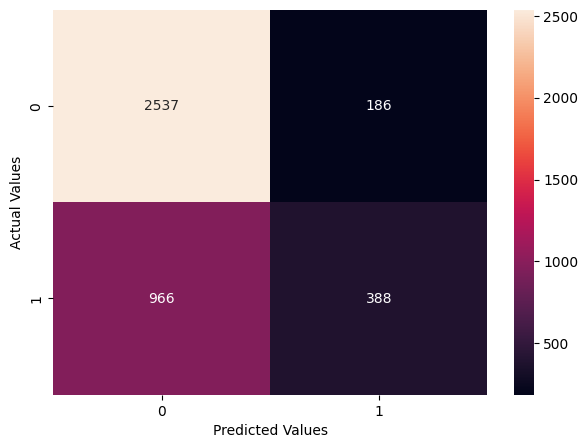

In [ ]:
# Confusion matrix for undersampled validation data for Random Forrest Classifier
cm_randomf_under_val = confusion_matrix(y_val, pred_val_randomf_under)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_randomf_under_val, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique) for use in AdaBoost
# Sampling_strategy is set to 1.0, meaning the minority class will be oversampled
# to have the same number of samples as the majority class
over_sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_adabost_over, y_train_adabost_over = over_sm.fit_resample(X_train, y_train)

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train_adabost_over,y_train_adabost_over)

AdaBoostClassifier(random_state=1)

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7392530814987429
Accuracy on test set :  0.7331240188383046
Recall on training set :  0.4957533234859675
Recall on test set :  0.49704491725768324
Precision on training set :  0.6383737517831669
Precision on test set :  0.6229629629629629


### Tuning Random forest using undersampled data

In [ ]:
# Build Forrest classifier using the undersampled data and best hyperparamaters calculated in the section above: "Finding best estimators for the Randon Forrest Classifier using Train and Test Dataset"
# using Randomized Search, as Grid Search method would not resolve.
randomf_under_tuned = RandomForestClassifier(n_estimators=150, min_samples_leaf= 9, min_impurity_decrease= 0.03,max_samples= 0.4,max_features= 0.60, max_depth= 3,class_weight='balanced_subsample', random_state=1)

In [ ]:
# Training with the Random Forrest Classifier
randomf_under_tuned.fit(X_train_randomf_under, y_train_randomf_under)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       max_features=0.6, max_samples=0.4,
                       min_impurity_decrease=0.03, min_samples_leaf=9,
                       n_estimators=150, random_state=1)

In [ ]:
# Predicting the target for train and test set
pred_train_randomf_under_tuned = randomf_under_tuned.predict(X_train_randomf_under)
pred_test_randomf_under_tuned = randomf_under_tuned.predict(X_test)

In [ ]:
# Using above defined function to get accuracy, recall and precision on train set
randomf_under_tuned_perf_train = model_performance_classification_sklearn(
    randomf_under_tuned, X_train_randomf_under, y_train_randomf_under
)
randomf_under_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.599,0.262,0.804,0.396


In [ ]:
# Using above defined function to get accuracy, recall and precision on test set
randomf_under_perf_test = model_performance_classification_sklearn(
    randomf_under, X_test, y_test
)
randomf_under_perf_test

,Accuracy,Recall,Precision,F1
0,0.707,0.264,0.643,0.375


### Tuning with Gradient boosting with oversampled data

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique) for use in AdaBoost
# Sampling_strategy is set to 1.0, meaning the minority class will be oversampled
# to have the same number of samples as the majority class
over_sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_gradientbost_over, y_train_gradientbost_over = over_sm.fit_resample(X_train, y_train)

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train_gradientbost_over,y_train_gradientbost_over)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7536027472864414
Accuracy on test set :  0.7462715855572999
Recall on training set :  0.5258493353028065
Recall on test set :  0.514775413711584
Precision on training set :  0.6626337831549558
Precision on test set :  0.6485480268056589


### Tuning XGBoost using oversampled data

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique) for use in AdaBoost
# Sampling_strategy is set to 1.0, meaning the minority class will be oversampled
# to have the same number of samples as the majority class
over_sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_xgbost_over, y_train_xgbost_over = over_sm.fit_resample(X_train, y_train)

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train_xgbost_over, y_train_xgbost_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8379836879867542
Accuracy on test set :  0.733712715855573
Recall on training set :  0.6645125553914328
Recall on test set :  0.4846335697399527
Precision on training set :  0.8135171790235082
Precision on test set :  0.6283524904214559


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [ ]:
# defining list of models
models = [abc, randomf_under_tuned, gbc, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Tuning AdaBoost using oversampled data','Tuning Random forest using undersampled data',
                                          'Tuning with Gradient boosting with oversampled data','Tuning XGBoost using oversampled data'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Tuning AdaBoost using oversampled data,0.740,0.730,0.500,0.500,0.640,0.620
1,Tuning Random forest using undersampled data,0.710,0.710,0.260,0.260,0.660,0.640
2,Tuning with Gradient boosting with oversampled...,0.750,0.750,0.530,0.510,0.660,0.650
3,Tuning XGBoost using oversampled data,0.840,0.730,0.660,0.480,0.810,0.630


## Actionable Insights

- The Tuning XGBoost Model using oversampled Train and Test datasets had the best accuracy among the Tunning models.

- For the Train dataset it came in at an 84% accuracy level, and had a 73%.  for the Test dataset, whcih exhibits a well generalized model. The Train dataset.

- Recall scores were 66% and 48%, low  for the Train and Test datasets, repectively recall.

- Precision scores were 81% and 63%, again low for the Train and Test datasets, repectively recall.


## Recommendations

- How to better treat the Outliers with no_of_employees,	prevailing_wage	and years_in_business columns (new column created that substituted  the column yr_of_estab).
- Apply some Scaling to the columns no_of_employees,	prevailing_wage	and years_in_business columns (new column created that substituted  the column yr_of_estab).  


<font size=6 color='blue'>Power Ahead</font>
___